In [1]:
%matplotlib inline
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y = titanic_data.Survived

In [5]:
#В дереве решений все значения, даже качественные, должны быть представленны в виде чисел
X = pd.get_dummies(X)
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1


In [6]:
# При реализации дерева решения необходимо позаботиться, чтобы все NaN были заполнены
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(3455.7990704835765, 1325.025, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(2180.5625570255474, 1257.075, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(1063.2738366788321, 1189.125, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(376.75182481751824, 1121.175, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(336.02189781021895, 1053.225, 'Age <= 10.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(295.2919708029197, 985.275, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(376.75182481751824, 985.275, 'SibSp <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(336.02189781021895, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(417.4817518248175, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(417.4817518248175, 1053.225, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1749.795848540146, 1121.175, 'Embarked_C <= 0.5\n

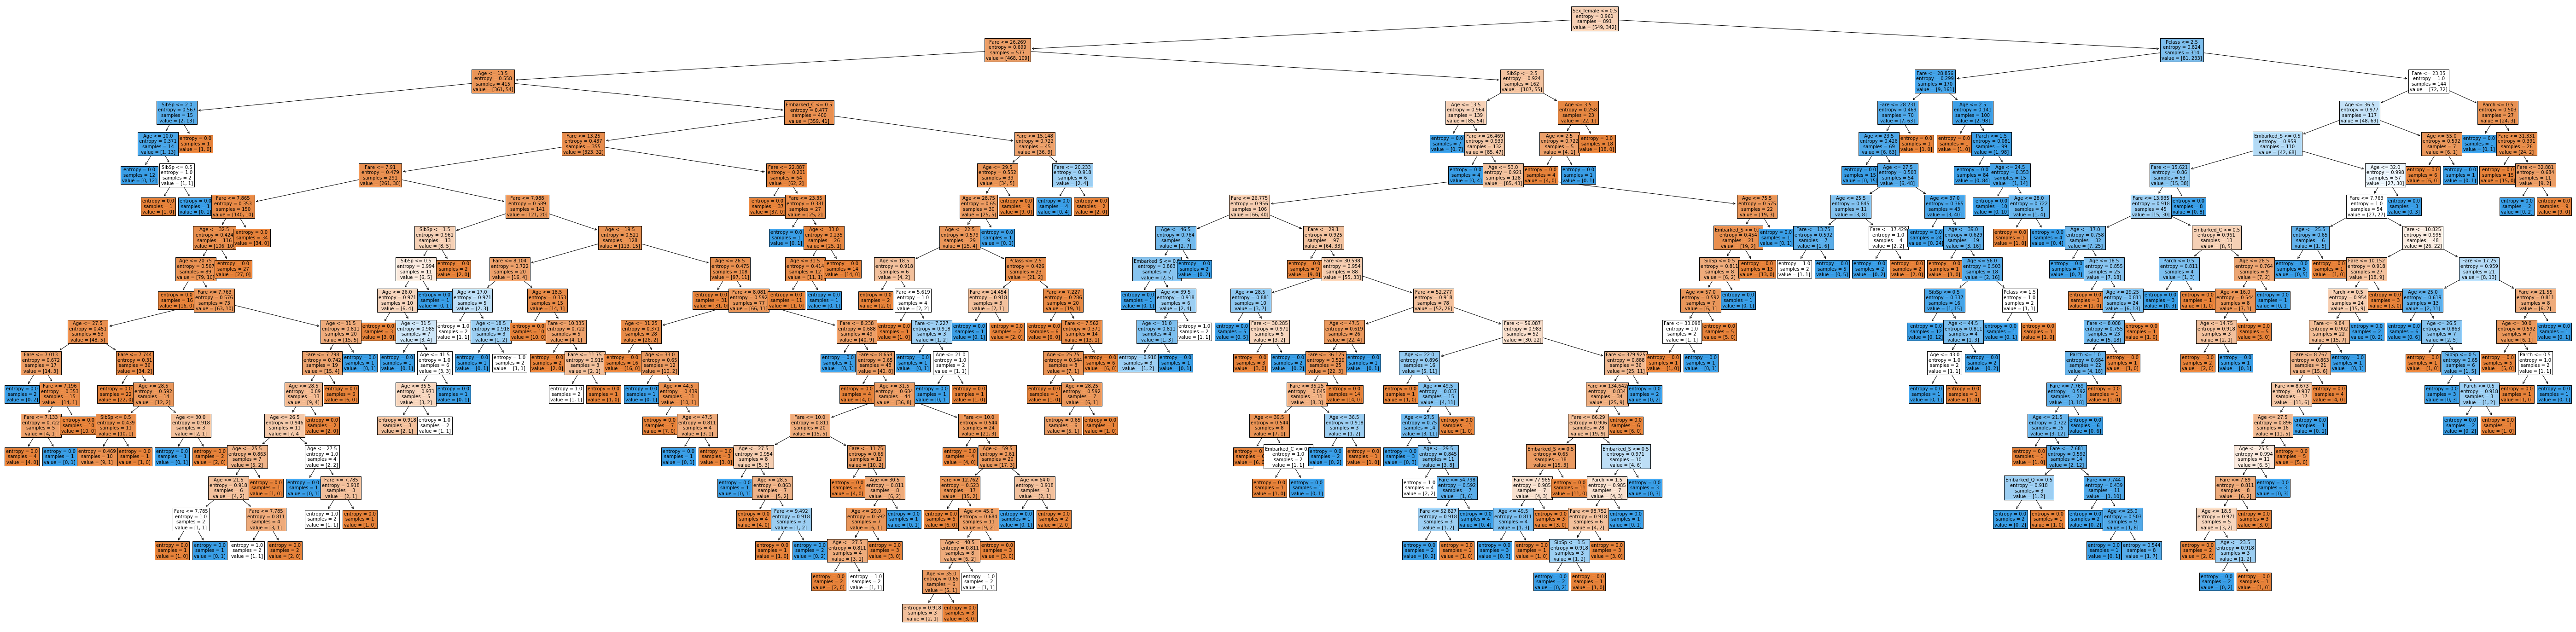

In [9]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [10]:
# Разбиение данных на тест и обучение
from sklearn.model_selection import train_test_split

In [11]:
# Данные, на которых дерево учится, и данные для теста, равные 33%
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33,
                                                   random_state=42)

In [12]:
# Правильность предсказания числа ответов
clf.score(X, Y)

0.9797979797979798

In [13]:
# Валидация значений на новой выборке
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [14]:
# Проверка правильности предсказания
clf.score(X_test, y_test)

0.7728813559322034

In [15]:
# Ограничиваем глубину дерева для предсказания закономерностей
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [17]:
# Улучшение правильности предсказания
clf.score(X_test, y_test)

0.8203389830508474

In [18]:
max_depth_values = range(1, 100)

In [19]:
scores_data = pd.DataFrame()

In [20]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [21]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [22]:
# Изненение формата ДФ
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

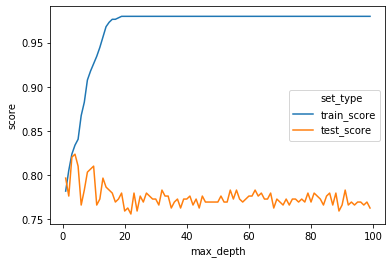

In [23]:
# Различается динамика обоих скоров
# Тест-скор максиальный при 4-5
# Вместе с учеличением тест-скоре трайн-скор начинает постепенно снижаться
# Начинается переобучение

sns.lineplot(x='max_depth', y='score',
             hue='set_type', data=scores_data_long)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
# Точность классификатора при разбиении на 5 кусочков
# Обучение происходило сначала на 1-4 с предсказанием 5
# Затем обучение происходило на 1-3 и 5 с предсказанием 4 и тд
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [27]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [40]:
scores_data.head(11)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.801984
0,6,0.867450,0.766102,0.793693
0,7,0.882550,0.772881,0.795317
0,8,0.909396,0.800000,0.791871
0,9,0.917785,0.800000,0.790218
0,10,0.926174,0.803390,0.790204


In [30]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [31]:
scores_data_long.query('set_type == "cross_val_score"').head(15)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.801984
203,6,cross_val_score,0.793693
204,7,cross_val_score,0.795317
205,8,cross_val_score,0.791871
206,9,cross_val_score,0.790218
207,10,cross_val_score,0.790204


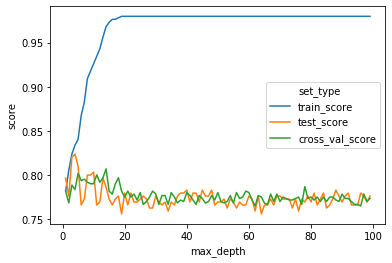

In [32]:
sns.lineplot(x='max_depth', y='score',
             hue='set_type', data=scores_data_long)

In [52]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [53]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7864406779661017